In [1]:
import numpy as np
import pandas as pd

from sklearn import model_selection
from sklearn import metrics
from sklearn import tree

from utils import plot_confusion_matrix, print_feature_importance

In [2]:
# load data
df = pd.read_csv("data.csv")
df.head()

,mean,median,variance,standard_deviation,skewness,kurtosis,energy,power,min,max,...,spectral_rolloff,spectral_flatness,spectral_contrast_1,spectral_contrast_2,spectral_contrast_3,spectral_contrast_4,spectral_contrast_5,spectral_contrast_6,class,label
0,0.007175,-0.005000,0.003303,0.057475,0.773794,1.274474,26.839275,0.003355,-0.165512,0.357898,...,6644.0,0.278167,21.453053,18.759037,14.661175,13.433640,14.679820,16.900347,0,normal
1,0.006852,-0.005121,0.003261,0.057102,0.755006,1.158208,26.460402,0.003308,-0.165512,0.357898,...,6592.0,0.263712,21.526815,19.696589,17.500044,12.948376,14.783238,17.295712,0,normal
2,0.006899,-0.005412,0.003278,0.057252,0.752437,1.138386,26.603138,0.003325,-0.165477,0.356079,...,6664.0,0.275542,23.085667,16.953186,13.793674,14.206233,14.005548,17.084328,0,normal
3,0.006747,-0.005653,0.003270,0.057184,0.765423,1.190150,26.523842,0.003315,-0.165427,0.334963,...,6634.0,0.254586,23.822327,17.729023,18.621729,15.826405,13.700122,17.114672,0,normal
4,0.006691,-0.005481,0.003236,0.056890,0.733439,1.052088,26.249964,0.003281,-0.165427,0.327365,...,6638.0,0.269549,25.288067,21.482197,17.620540,14.730481,15.418595,16.413952,0,normal


In [3]:
# load feature matrix, class vector, features list and labels from .csv file
X = df.drop(["class", "label"], axis=1).values
y = df["class"].values
FEATURES_LST = [column for column in df.columns if column not in ["class", "label"]]
labels = list(df["label"].unique())

In [4]:
# splitting the data into training and test sets
TEST_SIZE = 0.20
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [6]:
# fitting the decision tree classifier
clf = tree.DecisionTreeClassifier()
skf = model_selection.StratifiedKFold(n_splits=5, shuffle=True)
fdtree_cv_scores = model_selection.cross_val_score(clf, X_train, y_train, cv=skf)

# fitting the decision tree classifier
trained_model = clf.fit(X_train, y_train)
y_pred = trained_model.predict(X_test)

# tree params
print(f"Tree Max Depth: {trained_model.tree_.max_depth}")
print(f"Tree Leaves:    {trained_model.tree_.n_leaves}")
print(f"--------------")

# cross-validation results
print(f"Acc per fold: {[f'{s:.4f}' for s in fdtree_cv_scores]}")
print(f"Mean accuracy: {fdtree_cv_scores.mean():.4f}")

Tree Max Depth: 29
Tree Leaves:    1951
--------------
Acc per fold: ['0.7906', '0.7894', '0.7783', '0.7844', '0.7859']
Mean accuracy: 0.7857


In [7]:
print_feature_importance(FEATURES_LST, clf.feature_importances_, order_by='names', ascending=True)

energy:              0.0763
kurtosis:            0.1392
max:                 0.0158
mean:                0.0778
median:              0.1132
min:                 0.0184
peak_to_peak:        0.0336
power:               0.0237
root_mean_square:    0.0174
skewness:            0.0507
spectral_bandwidth:  0.0326
spectral_centroid:   0.0633
spectral_contrast_1: 0.0114
spectral_contrast_2: 0.0089
spectral_contrast_3: 0.0161
spectral_contrast_4: 0.0192
spectral_contrast_5: 0.0104
spectral_contrast_6: 0.0114
spectral_flatness:   0.0610
spectral_rolloff:    0.0451
standard_deviation:  0.0369
variance:            0.0248
zero_crossing_rate:  0.0930


Classification report:
              precision    recall  f1-score   support

           0       0.41      0.34      0.38       105
           1       0.70      0.71      0.70       400
           2       0.80      0.80      0.80       682
           3       0.70      0.70      0.70       755
           4       0.81      0.81      0.81      1133
           5       0.89      0.89      0.89      1205

    accuracy                           0.79      4280
   macro avg       0.72      0.71      0.71      4280
weighted avg       0.79      0.79      0.79      4280



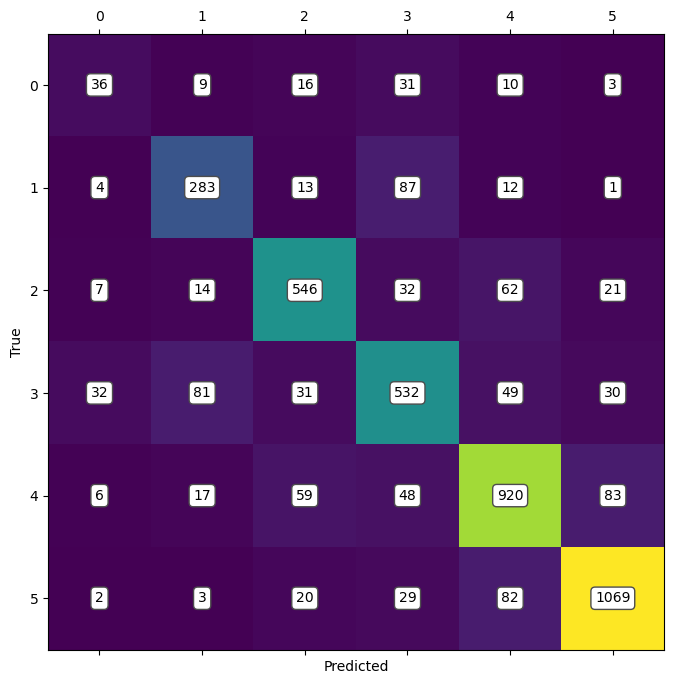

In [8]:
# printing classification report
print("Classification report:")
print(metrics.classification_report(y_true=y_test, y_pred=y_pred))

# plotting confusion matrix
plot_confusion_matrix(  y_true=y_test,
                        y_pred=y_pred,
                        labels=list(set(y)),
                        color_map="viridis",
                        print_colorbar=False,
                        print_numbers=True,
                        print_boxes=True)